In [1]:

import torch
import torch.nn as nn
import numpy as np

from torch.utils.data import Dataset

import pandas, random, numpy
import matplotlib.pyplot as plt

from PIL import Image, ImageOps
from torchsummary import summary


import glob
import PIL

from sklearn.model_selection import train_test_split


In [2]:

learning_rate = 0.0001


In [3]:

## !pip install scikit-learn
## !pip install numpy
## !pip install pandas
## !pip install matplotlib
## !pip install torchsummary 



## GPU

In [4]:
if torch.cuda.is_available():
  torch.set_default_tensor_type(torch.cuda.FloatTensor)
  print("using cuda:", torch.cuda.get_device_name(0))
  pass

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

device

using cuda: GeForce RTX 2080 Ti


device(type='cuda')

In [5]:

civs_path = 'data/imgs.new.CIVS'


In [6]:

path  = civs_path

paths = glob.glob(path + "/*.jpg") # Grabbing all the image file names

n_images = len(paths)

rand_idxs = np.random.permutation(n_images)

paths_subset = np.random.choice(paths, n_images , replace=False) 
all_paths   = paths_subset[rand_idxs]

print(n_images)


5016


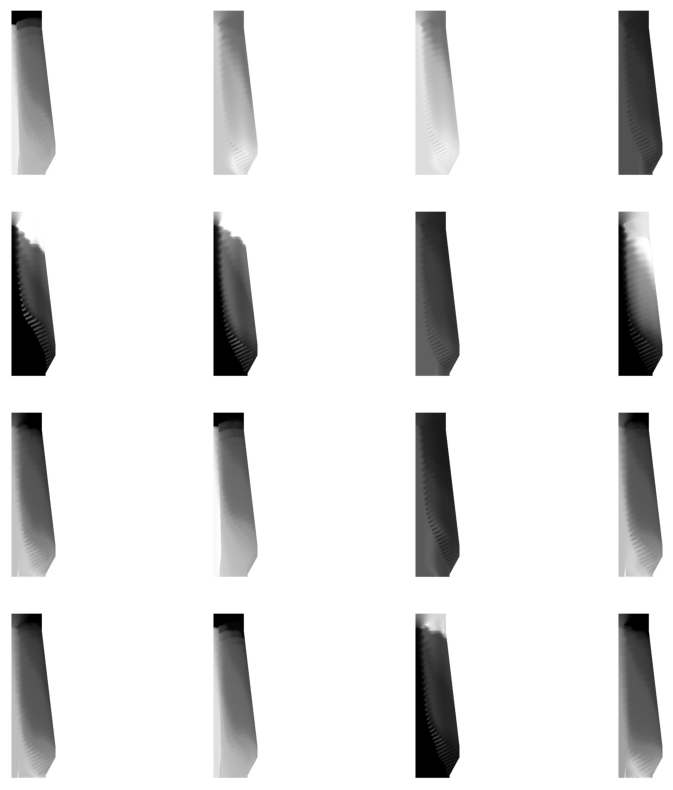

In [7]:

_, axes = plt.subplots(4, 4, figsize=(10, 10))

for ax, img_path in zip(axes.flatten(), all_paths):
    ax.imshow(Image.open(img_path))
    ax.axis("off")


In [8]:
## data/imgs.new.CIVS/h2_Ng90_Pci0_H0_Wp0_Ph300_Ox27_Ow3.0_Hbt1410_Wm12.2_Wr308750.4.jpg
## data/imgs.new.CIVS/h2o_Ng0_Pci150_H0_Wp0_Ph300_Ox24_Ow6_Hbt1459.8_Wm12.2_Wr308750.4.jpg
## data/imgs.new.CIVS/h2_Ng40_Pci60_H0_Wp0_Ph300_Ox23_Ow5_Hbt1459.8_Wm12.2_Wr308750.4.jpg

    
## ['tg', 'Ng0', 'Pci175', 'H0', 'Wp0', 'Ph300', 'Ox24', 'Ow7', 'Hbt1459.8', 'Wm12.2', 'Wr308750.4']
    

In [9]:

'''

['tg',  'Ng120', 'Pci0', 'H0', 'Wp0', 'Ph300', 'Ox30', 'Ow3.0', 'Hbt1485', 'Wm12.2', 'Wr308750.4']
['h2o', 'Ng70', 'Pci0', 'H0', 'Wp0', 'Ph500', 'Ox24', 'Ow5.0', 'Hbt1459.8', 'Wm12.2', 'Wr308750.4']
['co2', 'Ng50', 'Pci200', 'H0', 'Wp0', 'Ph300', 'Ox30', 'Ow4', 'Hbt1459.8', 'Wm12.2', 'Wr308750.4']


'''



"\n\n['tg',  'Ng120', 'Pci0', 'H0', 'Wp0', 'Ph300', 'Ox30', 'Ow3.0', 'Hbt1485', 'Wm12.2', 'Wr308750.4']\n['h2o', 'Ng70', 'Pci0', 'H0', 'Wp0', 'Ph500', 'Ox24', 'Ow5.0', 'Hbt1459.8', 'Wm12.2', 'Wr308750.4']\n['co2', 'Ng50', 'Pci200', 'H0', 'Wp0', 'Ph300', 'Ox30', 'Ow4', 'Hbt1459.8', 'Wm12.2', 'Wr308750.4']\n\n\n"

In [10]:



def label_func2(fname):
    ## print(fname)
    fname = fname.replace("data/imgs.new.CIVS/","")
    temp_name = fname.replace(".jpg", "").split("_")
    ## print(temp_name)
    
  
    y0 = temp_name[0]                              ## tg
    y1 = float(temp_name[1].replace("Ng", ""))     ## 'Ng0'
    y2 = float(temp_name[2].replace("Pci", ""))    ## 'Pci175'
    y3 = float(temp_name[3].replace("H", ""))     ## 'H0'
    y4 = float(temp_name[4].replace("Wp", ""))     ## 'Wp0'
    y5 = float(temp_name[5].replace("Ph", ""))     ## 'Ph300'
    y6 = float(temp_name[6].replace("Ox", ""))    ## 'Ox24'
    y7 = float(temp_name[7].replace("Ow", ""))     ## 'Ow7
    y8 = float(temp_name[8].replace("Hbt", ""))    ## 'Hbt1459.8'
    y9 = float(temp_name[9].replace("Wm", ""))    ## 'Wm12.2'
    y10 = float(temp_name[10].replace("Wr", ""))    ## 'Wr308750.4'
    
 
    ## np.array([y0, y1, y2, y3, y4, y5, y6, y7, y8, y9, y10 ])
    return [y0, y1, y2, y3, y4, y5, y6, y7, y8, y9, y10 ]



In [11]:

## 1400, 390
## x 0.2
## 280 , 78
## 140,  39


list_imgs = []
list_label_vectors = []

for img_name in all_paths:
    ##print(img_name)
    
    my_img = Image.open(img_name)
    
    my_img = my_img.resize((80, 280))
    ## my_img = ImageOps.grayscale(my_img)
 

    img_np = np.array(my_img)

    ## img_np = img_np.reshape(-1)
    
    temp_label_vector_rc = label_func2(img_name)
    if temp_label_vector_rc[0] == "tg":
    
        ## print(img_np.shape)
        list_imgs.append(img_np)
    
        ## conditions_labels_regression = label_func2(img_name)
        ## list_label_vectors.append( 0 ) 
        list_label_vectors.append( temp_label_vector_rc )


In [12]:

## X = np.array( list_imgs)
## y = np.array( list_label_vectors )
## print(X.shape)
## print(y.shape)

X =  list_imgs
y =  list_label_vectors 



In [13]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#######################################################

print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))


668
168
668
168


In [14]:
X_train[7].shape

(280, 80, 3)



## Dataset class


In [15]:

class MnistDataset(Dataset):
    
   
    def __init__(self):
     
        self.labels          = []
        self.tensor_imgs     = []
        self.one_hot_classes = []
        self.img_size_1d     = 21840
        self.n_samples       = 0
        self.noise_size      = 1000
        

    def plot_image(self, index):
        img = self.tensor_imgs[index]   ##.reshape(280, 78)
        print(img.shape)
        label = str( self.labels[index] )
        ## img = img.astype(float)
      
        return img, label
    
    


In [16]:

mnist_dataset = MnistDataset()


In [17]:


mnist_dataset.n_samples = len( X_train )

mnist_dataset.n_samples




668

In [18]:

for index in range(mnist_dataset.n_samples):
    
    # image target (label)
    reg_vals = y_train[index]
    target = torch.zeros( (10) )
    
    target[ 0 ] = reg_vals[1]
    target[ 1 ] = reg_vals[2]
    target[ 2 ] = reg_vals[3]
    target[ 3 ] = reg_vals[4]
    target[ 4 ] = reg_vals[5]
    target[ 5 ] = reg_vals[6]
    target[ 6 ] = reg_vals[7]
    target[ 7 ] = reg_vals[8]
    target[ 8 ] = reg_vals[9]
    target[ 9 ] = reg_vals[10]

    # image data, normalised from 0-255 to 0-1
    single_np_img = X_train[index]
    ## image_values = torch.FloatTensor(  single_np_img.astype(float)  ) / 255.0
    image_values = torch.cuda.FloatTensor(  single_np_img.astype(float)  ).permute(2,0,1).view(1,3,280,80) / 255.0
        
    mnist_dataset.labels.append(          reg_vals            )
    mnist_dataset.tensor_imgs.append(      image_values       )
    mnist_dataset.one_hot_classes.append(  target             )





In [19]:

print( len( mnist_dataset.labels           ))
print( len( mnist_dataset.tensor_imgs      ))
print( len( mnist_dataset.one_hot_classes  ))


668
668
668


In [20]:

img, the_reg_values = mnist_dataset.plot_image(45)


torch.Size([1, 3, 280, 80])


In [21]:
the_reg_values

"['tg', 90.0, 0.0, 0.0, 0.0, 300.0, 24.0, 8.0, 1459.8, 12.2, 308750.4]"

torch.Size([3, 280, 80])
torch.Size([280, 80, 3])


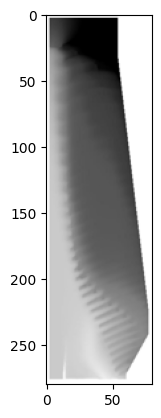

In [22]:

reshaped_img = img.squeeze(0)
print(  reshaped_img.shape  )

reshaped_img = reshaped_img.permute(1, 2, 0).cpu()  ###.view(1,3,280,78)

print(  reshaped_img.shape  )

plt.imshow(reshaped_img)
plt.show()




## Function to generate uniform random data


In [23]:

def generate_random(size):
    random_data = torch.rand(size)
    return random_data

def generate_random_image(size):
    random_data = torch.rand(size)
    return random_data


def generate_random_seed(size):
    random_data = torch.randn(size)
    return random_data



# size here must only be an integer
def generate_random_one_hot(size):
    label_tensor = torch.rand((size))
    return label_tensor



## Resize view class

In [24]:


class View(nn.Module):
    def __init__(self, shape):
        super().__init__()
        self.shape = shape,

    def forward(self, x):
        return x.view(*self.shape)
    




## Crop


In [25]:

# crop (numpy array) image to given width and height

def crop_centre(img, new_width, new_height):
    height, width, _ = img.shape
    startx = width//2 - new_width//2
    starty = height//2 - new_height//2    
    return img[  starty:starty + new_height, startx:startx + new_width, :]




## Discriminator


In [45]:

class Discriminator(nn.Module):
    
    def __init__(self):
        # initialise parent pytorch class
        super().__init__()
        
     
        self.model = nn.Sequential(
            ## nn.Linear(mnist_dataset.img_size_1d+11, 2000)
            # expect input of shape (1,3,280,80)
            nn.Conv2d(3, 256, kernel_size=8, stride=2),
            nn.BatchNorm2d(256),
            #nn.LeakyReLU(0.2),
            nn.GELU(),
            
            nn.Conv2d(256, 256, kernel_size=8, stride=2),
            nn.BatchNorm2d(256),
            #nn.LeakyReLU(0.2),
            nn.GELU(),
            
            nn.Conv2d(256, 3, kernel_size=8, stride=2),
            #nn.LeakyReLU(0.2),
            nn.GELU(),
            
            View(348),
            nn.Linear(348, 1),
            nn.Sigmoid()
        )
    
        # create loss function
        self.loss_function = nn.BCELoss()

        # create optimiser, simple stochastic gradient descent
        self.optimiser = torch.optim.Adam(self.parameters(), lr=learning_rate)
        

        # counter and accumulator for progress
        self.counter = 0;
        self.progress = []
        
      

    def forward_conditional(self, image_tensor, label_tensor):
        # combine seed and label
        inputs = torch.cat( (image_tensor, label_tensor) )
        return self.model(inputs)   

        
    def forward(self, inputs):
        # simply run model
        return self.model(inputs)

        
    def train_conditional(self, inputs, label_tensor, targets):
        # calculate the output of the network
        outputs = self.forward(inputs, label_tensor)
        
        # calculate loss
        loss = self.loss_function(outputs, targets)

        # increase counter and accumulate error every 10
        self.counter += 1;
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
        
        if (self.counter % 200 == 0):
            print("counter = ", self.counter)
         

        # zero gradients, perform a backward pass, update weights
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()

    
    def train(self, inputs, targets):
        # calculate the output of the network
        outputs = self.forward(inputs)
        
        # calculate loss
        loss = self.loss_function(outputs, targets)

        # increase counter and accumulate error every 10
        self.counter += 1;
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
            pass
        if (self.counter % 1000 == 0):
            print("counter = ", self.counter)
            pass

        # zero gradients, perform a backward pass, update weights
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()
    
    
    def plot_progress(self):
        df = pandas.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5, 1.0, 5.0))
   
 
       



## Test that the discriminator can separate real data from random noise


In [46]:

print( mnist_dataset )


In [47]:

%%time

D = Discriminator()
D.to(device)

for i in range(mnist_dataset.n_samples):
    label             = mnist_dataset.labels[i]
    image_data_tensor = mnist_dataset.tensor_imgs[i]
    target_tensor     = mnist_dataset.one_hot_classes[i]
 

    ## D.train_conditional(image_data_tensor, target_tensor, torch.FloatTensor([1.0]))
    D.train(image_data_tensor, torch.cuda.FloatTensor([1.0]))
    # fake data
    '''   
    D.train(
           generate_random_image(mnist_dataset.img_size_1d), 
           generate_random_one_hot(11), 
           torch.FloatTensor([0.0])
    )
    
    '''
    D.train(
           generate_random_image((1,3,280,80)), 
           torch.cuda.FloatTensor([0.0])
    )
 




counter =  1000
CPU times: user 5.36 s, sys: 2.2 s, total: 7.57 s
Wall time: 7.57 s


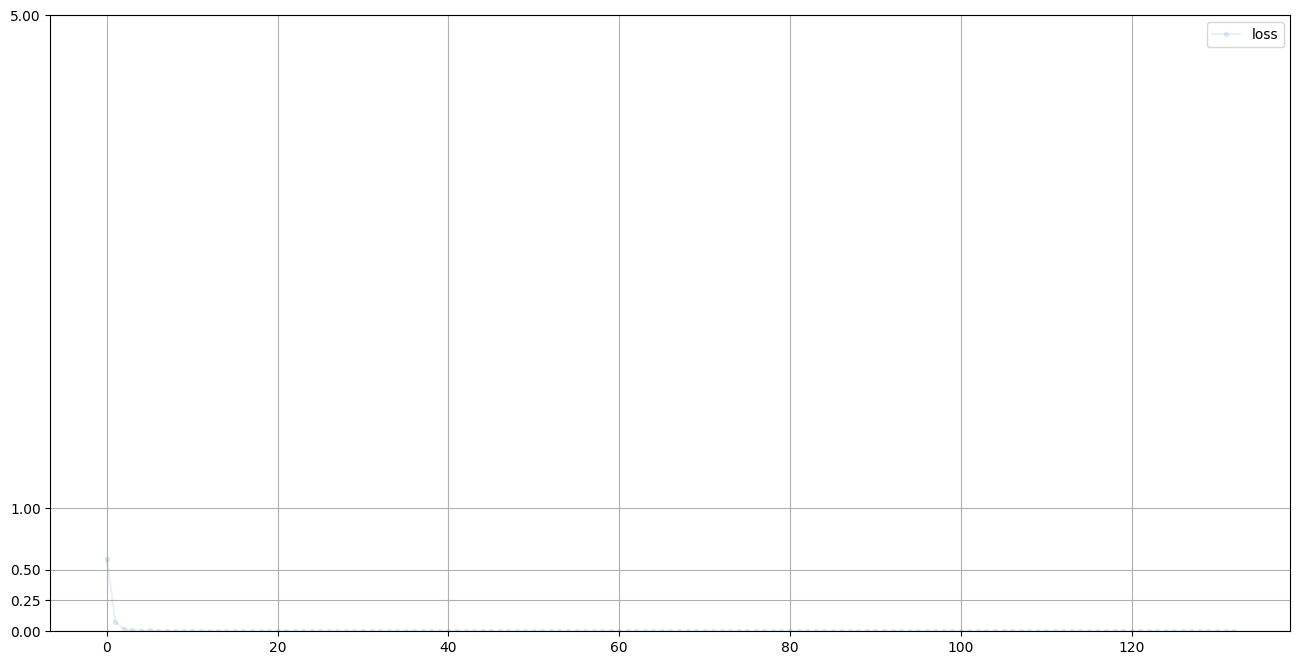

In [48]:

D.plot_progress()



## Manually run discriminator to check it can tell real data from fake


In [49]:

for i in range(4):
    index = random.randint(0,mnist_dataset.n_samples) 
    image_data_tensor = mnist_dataset.tensor_imgs [     index   ]
    target_tensor     = mnist_dataset.one_hot_classes[  index   ]

    ## print( D.forward( image_data_tensor, target_tensor ).item() )
    print( D.forward( image_data_tensor ).item() )


for i in range(4):
    ## print( D.forward( generate_random_image(mnist_dataset.img_size_1d), generate_random_one_hot(11) ).item() )
    print( D.forward( generate_random_image((1,3,280,80)) ).item() )





0.9999297857284546
0.9999840259552002
0.999981164932251
0.9999772310256958
2.0364932424854487e-05
2.7382242478779517e-05
1.998848165385425e-05
1.3582566680270247e-05



## My ConvTranspose2d()


In [50]:

class MyConvTranspose2d(nn.Module):
    
    def __init__(self, conv, output_size):
        super(MyConvTranspose2d, self).__init__()
        self.output_size = output_size
        self.conv = conv
        
    def forward(self, x):
        x = self.conv(x, output_size=self.output_size)
        return x



## Figuring out the convolution maths for the Generator


In [51]:

mm_tensor_test = torch.randn(1, 3, 30, 5)
mm_tensor_test.shape



torch.Size([1, 3, 30, 5])

In [52]:

mm_conv_transp_test = nn.ConvTranspose2d(3, 256, kernel_size=8, stride=2)


In [53]:

mm_res_test = mm_conv_transp_test(mm_tensor_test)

mm_res_test.shape



torch.Size([1, 256, 66, 16])

In [54]:

ll_conv_transp_test = nn.ConvTranspose2d(256, 256, kernel_size=8, stride=2)


In [55]:

ll_res_test = ll_conv_transp_test(mm_res_test)

ll_res_test.shape


torch.Size([1, 256, 138, 38])

In [56]:

ss_conv_transp_test = nn.ConvTranspose2d(256, 3, kernel_size=8, stride=2, padding=1)


In [57]:

ss_out = ss_conv_transp_test(ll_res_test)


ss_out.shape




torch.Size([1, 3, 280, 80])

In [58]:

vv_view = View(  (1, 3, 280, 80)  )


In [59]:



vv_res = vv_view(ss_out)




In [60]:


vv_res.shape



torch.Size([1, 3, 280, 80])


## Generator Network


In [61]:

class Generator(nn.Module):
    
    def __init__(self):
        
        super().__init__()
        
        self.model = nn.Sequential(
            ## nn.Linear(mnist_dataset.noise_size+11, 2000)
            # input is a 1d array
            nn.Linear(100, 450),
            #nn.LeakyReLU(0.2),
            nn.GELU(),
            
           
            # reshape to 4d
            View((1, 3, 30, 5)),
            
   
            nn.ConvTranspose2d(3, 256, kernel_size=8, stride=2),
            nn.BatchNorm2d(256),
            #nn.LeakyReLU(0.2),
            nn.GELU(),
            
            
            nn.ConvTranspose2d(256,256, kernel_size=8, stride=2),
            nn.BatchNorm2d(256),
            #nn.LeakyReLU(0.2),
            nn.GELU(),

            nn.ConvTranspose2d(256, 3, kernel_size=8, stride=2, padding=1),
            nn.BatchNorm2d(3),
            
            
            ### View(9408),
            ### nn.Linear(9408, 16380),
            # output should be (1,3,128,128) ## (1, 3, 280, 78)
            
            nn.Sigmoid()
            ### View(  (1, 3, 140, 39)  )
        )
        
 
        self.optimiser = torch.optim.Adam(self.parameters(), lr=learning_rate)

        # counter and accumulator for progress
        self.counter  = 0;
        self.progress = []
        

        
    def forward_conditional(self, seed_tensor, label_tensor):        
        # combine seed and label
        inputs = torch.cat( (seed_tensor, label_tensor) )
        return self.model(inputs)

        
    
    def forward(self, inputs):        
        # simply run model
        return self.model(inputs)
    
    
    def train_conditional(self, D, inputs, label_tensor, targets):
        # calculate the output of the network
        g_output = self.forward(inputs, label_tensor)
        
        # pass onto Discriminator
        d_output = D.forward(g_output, label_tensor)
        
        # calculate error
        loss = D.loss_function(d_output, targets)

        # increase counter and accumulate error every 10
        self.counter += 1;
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
         

        # zero gradients, perform a backward pass, update weights
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()
        
        
    def train(self, D, inputs, targets):
        # calculate the output of the network
        g_output = self.forward(inputs)
        
        # pass onto Discriminator
        d_output = D.forward(g_output)
        
        # calculate error
        loss = D.loss_function(d_output, targets)

        # increase counter and accumulate error every 10
        self.counter += 1;
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())

        # zero gradients, perform a backward pass, update weights
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()

  
    
    def plot_progress(self):
        df = pandas.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5, 1.0, 5.0))
        

    
        
    def plot_images(self, label):
        label_tensor = torch.zeros((10))
        label_tensor[label] = 1.0
        # plot a 3 column, 2 row array of sample images
        f, axarr = plt.subplots(2,3, figsize=(16,8))
        for i in range(2):
            for j in range(3):
                axarr[i,j].imshow(
                            G.forward(
                            generate_random_seed(100), 
                            label_tensor
                            ).detach().cpu().numpy().reshape(28,28), interpolation='none', cmap='Blues'
                )
        

        

        

In [62]:
class Generator2(nn.Module):
    
    def __init__(self):
        
        super().__init__()
        
        
        self.model = nn.Sequential(
            nn.Linear(1000, 3000),
            ## nn.LeakyReLU(0.02),
            nn.GELU(),
            nn.LayerNorm(3000),
            
            nn.Linear(3000, 6000),
            ## nn.LeakyReLU(0.02),
            nn.GELU(),
            nn.LayerNorm(6000),
            
            nn.Linear(6000, 16380),
            nn.GELU(),
            nn.LayerNorm(16380),
           
            nn.Sigmoid(),
            View(  (1, 3, 140, 39)  )
        )
        

        self.optimiser = torch.optim.Adam(self.parameters(), lr=0.0001)

        # counter and accumulator for progress
        self.counter  = 0;
        self.progress = []
        

        
    def forward_conditional(self, seed_tensor, label_tensor):        
        # combine seed and label
        inputs = torch.cat( (seed_tensor, label_tensor) )
        return self.model(inputs)

        
    
    def forward(self, inputs):        
        # simply run model
        return self.model(inputs)
    
    
    def train_conditional(self, D, inputs, label_tensor, targets):
        # calculate the output of the network
        g_output = self.forward(inputs, label_tensor)
        
        # pass onto Discriminator
        d_output = D.forward(g_output, label_tensor)
        
        # calculate error
        loss = D.loss_function(d_output, targets)

        # increase counter and accumulate error every 10
        self.counter += 1;
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
         

        # zero gradients, perform a backward pass, update weights
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()
        
        
    def train(self, D, inputs, targets):
        # calculate the output of the network
        g_output = self.forward(inputs)
        
        # pass onto Discriminator
        d_output = D.forward(g_output)
        
        # calculate error
        loss = D.loss_function(d_output, targets)

        # increase counter and accumulate error every 10
        self.counter += 1;
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())

        # zero gradients, perform a backward pass, update weights
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()

  
    
    def plot_progress(self):
        df = pandas.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5, 1.0, 5.0))
        

    
        
    def plot_images(self, label):
        label_tensor = torch.zeros((10))
        label_tensor[label] = 1.0
        # plot a 3 column, 2 row array of sample images
        f, axarr = plt.subplots(2,3, figsize=(16,8))
        for i in range(2):
            for j in range(3):
                axarr[i,j].imshow(
                            G.forward(
                            generate_random_seed(100), 
                            label_tensor
                            ).detach().cpu().numpy().reshape(28,28), interpolation='none', cmap='Blues'
                )
        

        

        


    
    



## Check the generator output is of the right type and shape


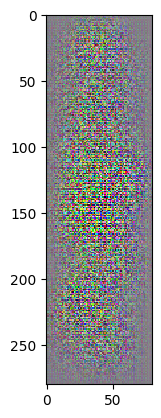

In [63]:

G = Generator()


## output = G.forward(generate_random_seed(mnist_dataset.noise_size), generate_random_one_hot(11))
output = G.forward(generate_random_seed(100))


img = output.detach().permute(0,2,3,1).view(280,80,3).cpu().numpy()


plt.imshow(img, interpolation='none', cmap='Blues')





## Train GAN

create Discriminator and Generator

train Discriminator and Generator


In [64]:

D = Discriminator()
G = Generator()

D.to(device)
G.to(device)
     


Generator(
  (model): Sequential(
    (0): Linear(in_features=100, out_features=450, bias=True)
    (1): GELU(approximate='none')
    (2): View()
    (3): ConvTranspose2d(3, 256, kernel_size=(8, 8), stride=(2, 2))
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): GELU(approximate='none')
    (6): ConvTranspose2d(256, 256, kernel_size=(8, 8), stride=(2, 2))
    (7): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): GELU(approximate='none')
    (9): ConvTranspose2d(256, 3, kernel_size=(8, 8), stride=(2, 2), padding=(1, 1))
    (10): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Sigmoid()
  )
)

In [65]:


epochs = 1000

for epoch in range(epochs):
    print(epoch)
    print("epoch = ", epoch + 1)

    for i in range(mnist_dataset.n_samples):
        
    
        label             = mnist_dataset.labels[i]
        image_data_tensor = mnist_dataset.tensor_imgs[i]
        target_tensor     = mnist_dataset.one_hot_classes[i]
    
        
        # train discriminator on true
        ## D.train(image_data_tensor, target_tensor, torch.FloatTensor([1.0]) )
    
        D.train(image_data_tensor, torch.cuda.FloatTensor([1.0]))
    
        # random 1-hot label for generator
        ## random_label = generate_random_one_hot(1)
    
        # train discriminator on false
        # use detach() so gradients in G are not calculated

        '''
        D.train( G.forward(  
                           generate_random_seed(mnist_dataset.noise_size), 
                           random_label
                      ).detach(),                 # use detach() so gradients in G are not calculated
             random_label, 
             torch.FloatTensor( [0.0] )
           )
        '''
    
        D.train(G.forward(generate_random_seed(100)).detach(), torch.cuda.FloatTensor([0.0]))
    
        ## random_label = generate_random_one_hot(11)
    
        ## G.train(D, generate_random_seed(mnist_dataset.noise_size), random_label, torch.FloatTensor([1.0]))
        G.train(D, generate_random_seed(100), torch.cuda.FloatTensor([1.0]))
    
      
    
  


0
epoch =  1
counter =  1000
1
epoch =  2
counter =  2000
2
epoch =  3
counter =  3000
counter =  4000
3
epoch =  4
counter =  5000
4
epoch =  5
counter =  6000
5
epoch =  6
counter =  7000
counter =  8000
6
epoch =  7
counter =  9000
7
epoch =  8
counter =  10000
8
epoch =  9
counter =  11000
counter =  12000
9
epoch =  10
counter =  13000
10
epoch =  11
counter =  14000
11
epoch =  12
counter =  15000
counter =  16000
12
epoch =  13
counter =  17000
13
epoch =  14
counter =  18000
14
epoch =  15
counter =  19000
counter =  20000
15
epoch =  16
counter =  21000
16
epoch =  17
counter =  22000
17
epoch =  18
counter =  23000
counter =  24000
18
epoch =  19
counter =  25000
19
epoch =  20
counter =  26000
20
epoch =  21
counter =  27000
counter =  28000
21
epoch =  22
counter =  29000
22
epoch =  23
counter =  30000
23
epoch =  24
counter =  31000
counter =  32000
24
epoch =  25
counter =  33000
25
epoch =  26
counter =  34000
26
epoch =  27
counter =  35000
counter =  36000
27
epoch = 

208
epoch =  209
counter =  278000
counter =  279000
209
epoch =  210
counter =  280000
210
epoch =  211
counter =  281000
211
epoch =  212
counter =  282000
counter =  283000
212
epoch =  213
counter =  284000
213
epoch =  214
counter =  285000
214
epoch =  215
counter =  286000
counter =  287000
215
epoch =  216
counter =  288000
216
epoch =  217
counter =  289000
217
epoch =  218
counter =  290000
counter =  291000
218
epoch =  219
counter =  292000
219
epoch =  220
counter =  293000
220
epoch =  221
counter =  294000
counter =  295000
221
epoch =  222
counter =  296000
222
epoch =  223
counter =  297000
223
epoch =  224
counter =  298000
counter =  299000
224
epoch =  225
counter =  300000
225
epoch =  226
counter =  301000
226
epoch =  227
counter =  302000
counter =  303000
227
epoch =  228
counter =  304000
228
epoch =  229
counter =  305000
229
epoch =  230
counter =  306000
counter =  307000
230
epoch =  231
counter =  308000
231
epoch =  232
counter =  309000
232
epoch =  233

counter =  545000
408
epoch =  409
counter =  546000
409
epoch =  410
counter =  547000
410
epoch =  411
counter =  548000
counter =  549000
411
epoch =  412
counter =  550000
412
epoch =  413
counter =  551000
413
epoch =  414
counter =  552000
counter =  553000
414
epoch =  415
counter =  554000
415
epoch =  416
counter =  555000
416
epoch =  417
counter =  556000
counter =  557000
417
epoch =  418
counter =  558000
418
epoch =  419
counter =  559000
419
epoch =  420
counter =  560000
counter =  561000
420
epoch =  421
counter =  562000
421
epoch =  422
counter =  563000
422
epoch =  423
counter =  564000
counter =  565000
423
epoch =  424
counter =  566000
424
epoch =  425
counter =  567000
425
epoch =  426
counter =  568000
counter =  569000
426
epoch =  427
counter =  570000
427
epoch =  428
counter =  571000
428
epoch =  429
counter =  572000
counter =  573000
429
epoch =  430
counter =  574000
430
epoch =  431
counter =  575000
431
epoch =  432
counter =  576000
counter =  57700

counter =  812000
608
epoch =  609
counter =  813000
609
epoch =  610
counter =  814000
610
epoch =  611
counter =  815000
counter =  816000
611
epoch =  612
counter =  817000
612
epoch =  613
counter =  818000
613
epoch =  614
counter =  819000
counter =  820000
614
epoch =  615
counter =  821000
615
epoch =  616
counter =  822000
616
epoch =  617
counter =  823000
counter =  824000
617
epoch =  618
counter =  825000
618
epoch =  619
counter =  826000
619
epoch =  620
counter =  827000
counter =  828000
620
epoch =  621
counter =  829000
621
epoch =  622
counter =  830000
622
epoch =  623
counter =  831000
counter =  832000
623
epoch =  624
counter =  833000
624
epoch =  625
counter =  834000
counter =  835000
625
epoch =  626
counter =  836000
626
epoch =  627
counter =  837000
627
epoch =  628
counter =  838000
counter =  839000
628
epoch =  629
counter =  840000
629
epoch =  630
counter =  841000
630
epoch =  631
counter =  842000
counter =  843000
631
epoch =  632
counter =  84400

counter =  1076000
806
epoch =  807
counter =  1077000
counter =  1078000
807
epoch =  808
counter =  1079000
808
epoch =  809
counter =  1080000
809
epoch =  810
counter =  1081000
counter =  1082000
810
epoch =  811
counter =  1083000
811
epoch =  812
counter =  1084000
812
epoch =  813
counter =  1085000
counter =  1086000
813
epoch =  814
counter =  1087000
814
epoch =  815
counter =  1088000
815
epoch =  816
counter =  1089000
counter =  1090000
816
epoch =  817
counter =  1091000
817
epoch =  818
counter =  1092000
818
epoch =  819
counter =  1093000
counter =  1094000
819
epoch =  820
counter =  1095000
820
epoch =  821
counter =  1096000
821
epoch =  822
counter =  1097000
counter =  1098000
822
epoch =  823
counter =  1099000
823
epoch =  824
counter =  1100000
824
epoch =  825
counter =  1101000
counter =  1102000
825
epoch =  826
counter =  1103000
826
epoch =  827
counter =  1104000
827
epoch =  828
counter =  1105000
counter =  1106000
828
epoch =  829
counter =  1107000
8

999
epoch =  1000
counter =  1335000
counter =  1336000



## Plot discriminator error

for the discriminator, we want the loss values to be around 0.25 for a balanced discriminator and generator, there the discriminator is not confident at telling real images from generated images. if the loss values fall towards zero, it suggests the generator has not learned to fool the discriminator.


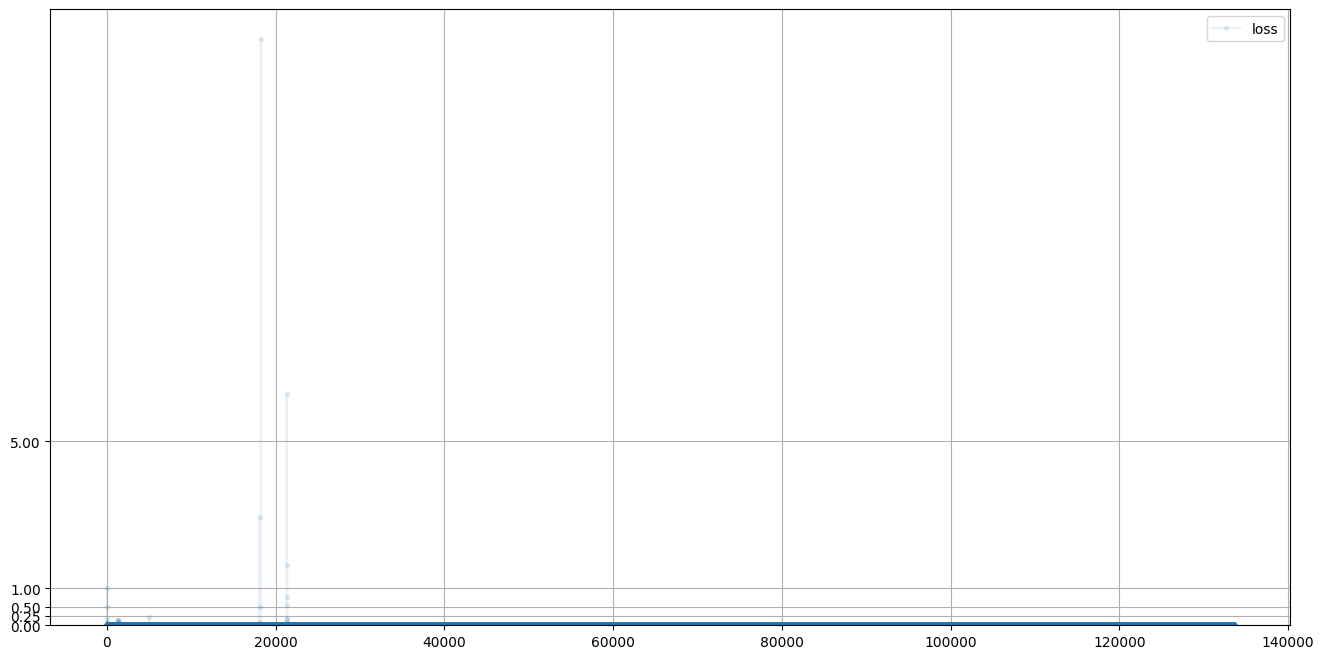

In [66]:

D.plot_progress()



## Plot generator error


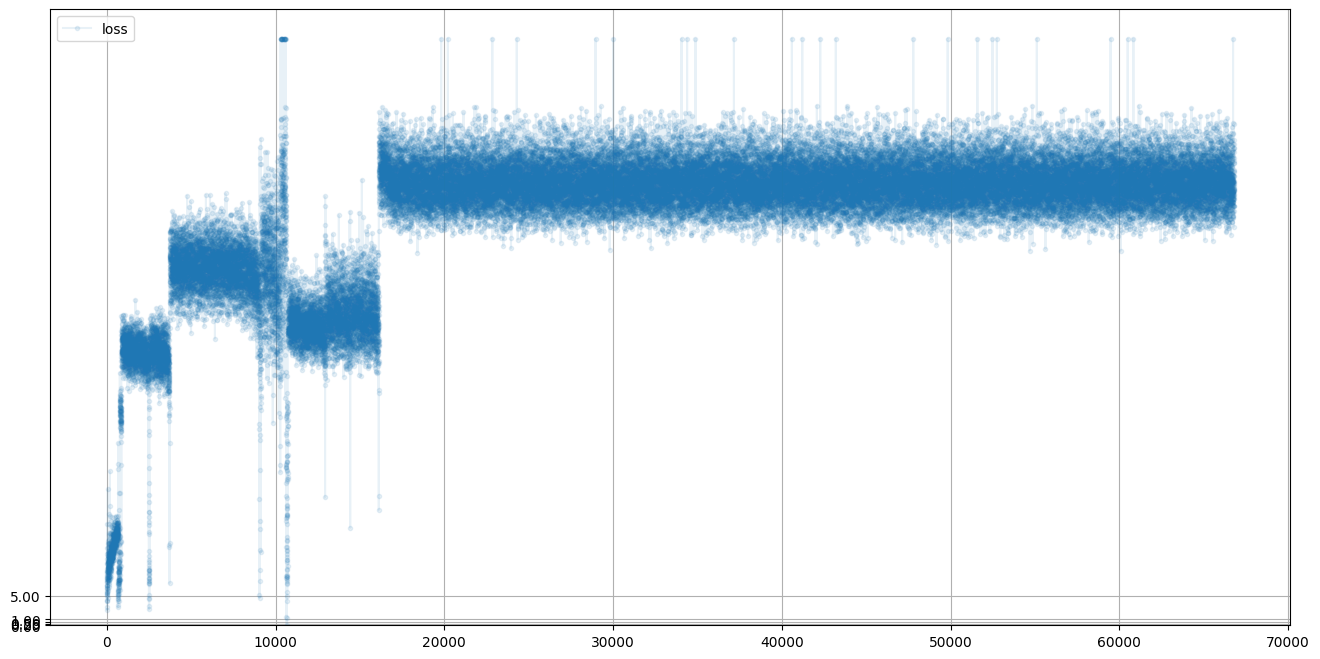

In [67]:

G.plot_progress()


## Random trained generation

* plot a 3 column, 2 row array of generated images



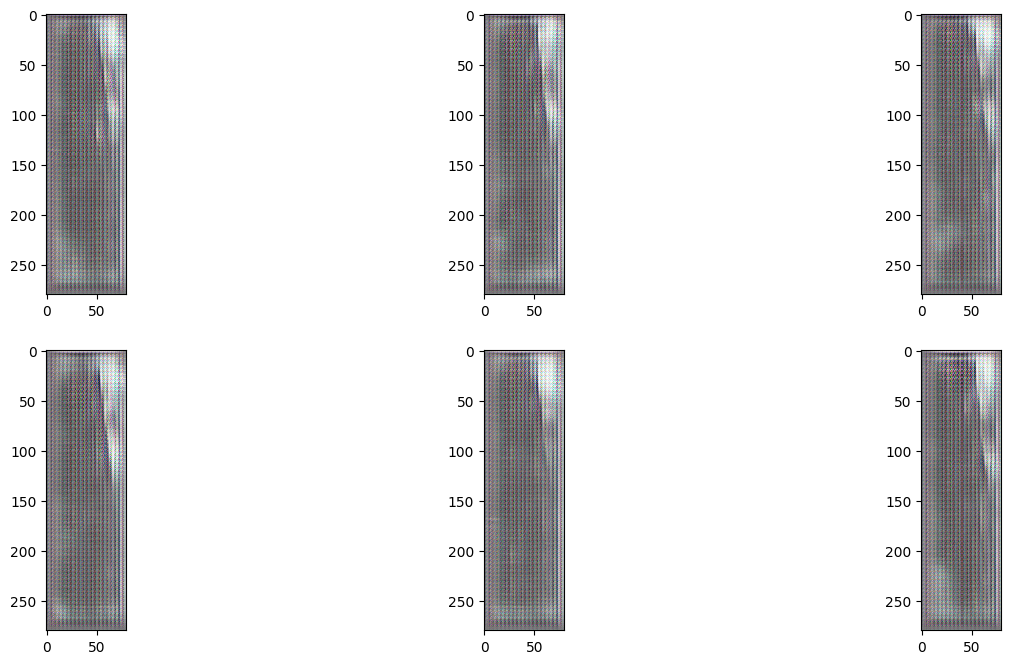

In [68]:



f, axarr = plt.subplots(2,3, figsize=(16,8))

for i in range(2):
    for j in range(3):
        output = G.forward(generate_random_seed(100))
        img = output.detach().permute(0,2,3,1).view(280,80,3).cpu().numpy()
        axarr[i,j].imshow(img, interpolation='none', cmap='Blues')
 




## Run Generator after training

plot several outputs from the trained generator

plot a 3 column, 2 row array of generated images


In [ ]:

## data/imgs.new.CIVS/h2_Ng90_Pci0_H0_Wp0_Ph300_Ox27_Ow3.0_Hbt1410_Wm12.2_Wr308750.4.jpg
## data/imgs.new.CIVS/h2o_Ng0_Pci150_H0_Wp0_Ph300_Ox24_Ow6_Hbt1459.8_Wm12.2_Wr308750.4.jpg
## data/imgs.new.CIVS/h2_Ng40_Pci60_H0_Wp0_Ph300_Ox23_Ow5_Hbt1459.8_Wm12.2_Wr308750.4.jpg




In [ ]:



target = torch.zeros( (11) )

    
target[ 0 ] = 0.0
target[ 1 ] = 37.9
target[ 2 ] = 0.0
target[ 3 ] = 0.0
target[ 4 ] = 0.0
target[ 5 ] = 400.0
target[ 6 ] = 24.0
target[ 7 ] = 5.0
target[ 8 ] = 1459.8
target[ 9 ] = 12.2
target[ 10 ] = 308750.4
        

        
f, axarr = plt.subplots(2,3, figsize=(16,8))

for i in range(2):
    for j in range(3):
        output = G.forward(generate_random_seed(mnist_dataset.noise_size), target)
        img = output.detach().numpy().reshape(280,80)
        axarr[i,j].imshow(img, interpolation='none', cmap='Blues')

      

